In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import sklearn
import seaborn as sns
import os
import sys
import catboost
import lightgbm

C:\Users\andre\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("OneDrive/Desktop/student-mat.csv")

In [7]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
[df[column].dtype for column in df.columns]

[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [9]:
df_num = pd.concat([df[column] for column in df.columns if str(df[column].dtype) == 'int64'], axis = 1)
df_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [10]:
df_num_corr = df_num.corr()
df_num_corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


<AxesSubplot:>

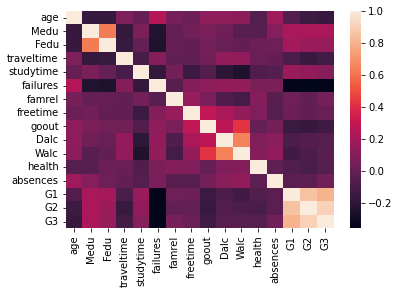

In [11]:
sns.heatmap(df_num_corr)

In [12]:
for column in df_num_corr.columns:
    df_num_corr.loc[column][column] = -1
print(df_num_corr.max())

print(" ")

for column in df_num_corr.columns:
    df_num_corr.loc[column][column] = 1
print(df_num_corr.min())

age           0.243665
Medu          0.623455
Fedu          0.623455
traveltime    0.138325
studytime     0.160612
failures      0.243665
famrel        0.150701
freetime      0.285019
goout         0.420386
Dalc          0.647544
Walc          0.647544
health        0.094056
absences      0.175230
G1            0.852118
G2            0.904868
G3            0.904868
dtype: float64
 
age          -0.163658
Medu         -0.236680
Fedu         -0.250408
traveltime   -0.171639
studytime    -0.253785
failures     -0.360415
famrel       -0.113397
freetime     -0.143198
goout        -0.162250
Dalc         -0.196019
Walc         -0.253785
health       -0.097720
absences     -0.062700
G1           -0.354718
G2           -0.355896
G3           -0.360415
dtype: float64


In [13]:
pd.crosstab(df_num['Dalc'], df_num['Walc'])

Walc,1,2,3,4,5
Dalc,,,,,
1,150,65,42,15,4
2,1,18,29,22,5
3,0,1,8,11,6
4,0,1,1,3,4
5,0,0,0,0,9


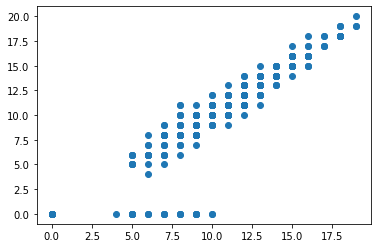

In [14]:
plt.scatter(df_num['G2'], df_num['G3'])

In [15]:
df_num.max() - df_num.min()

age            7
Medu           4
Fedu           4
traveltime     3
studytime      3
failures       3
famrel         4
freetime       4
goout          4
Dalc           4
Walc           4
health         4
absences      75
G1            16
G2            19
G3            20
dtype: int64

(array([183.,  61.,  43.,  25.,  32.,  15.,  11.,   6.,   8.,   2.,   2.,
          1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5,
        55. , 57.5, 60. , 62.5, 65. , 67.5, 70. , 72.5, 75. ]),
 <BarContainer object of 30 artists>)

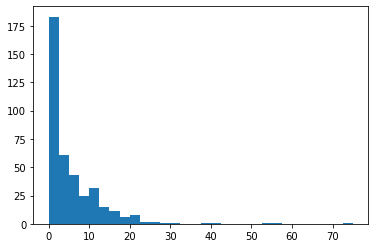

In [16]:
plt.hist(df_num['absences'], bins = 30)

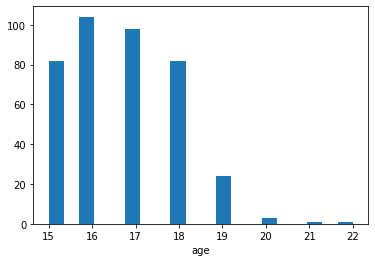

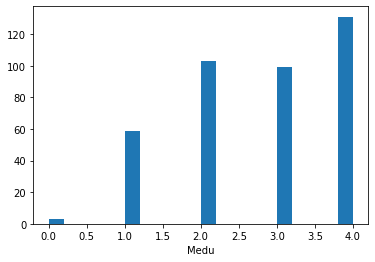

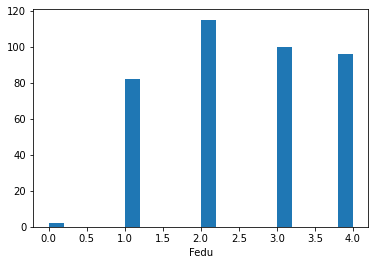

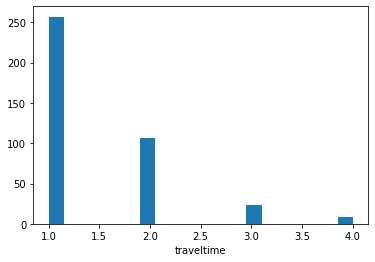

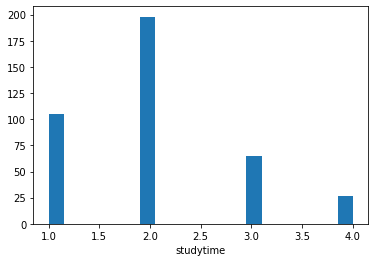

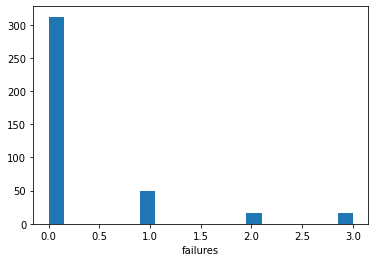

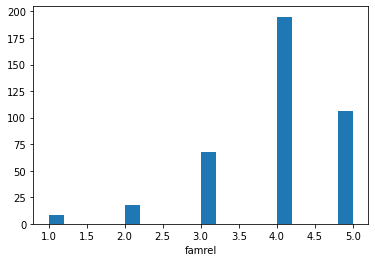

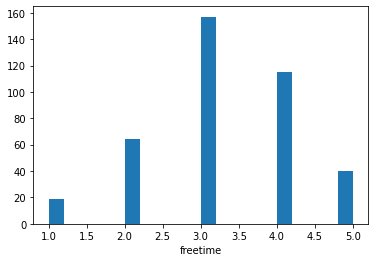

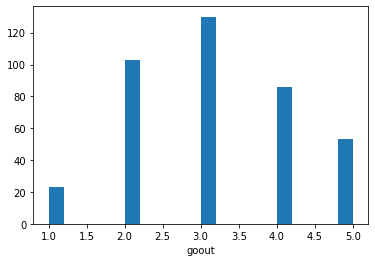

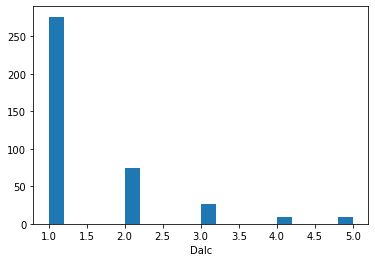

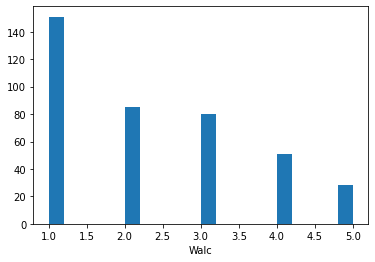

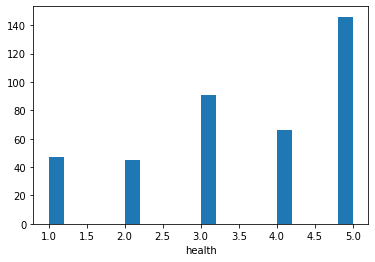

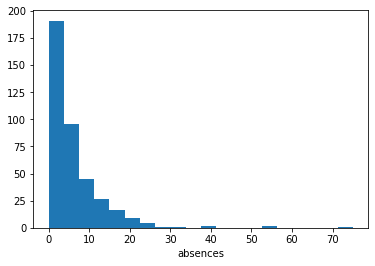

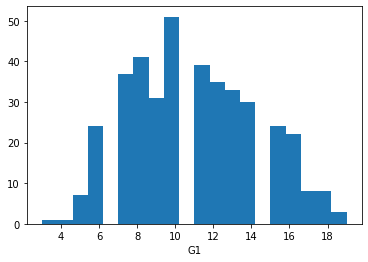

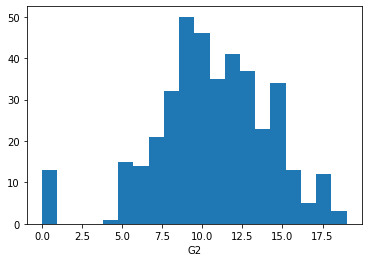

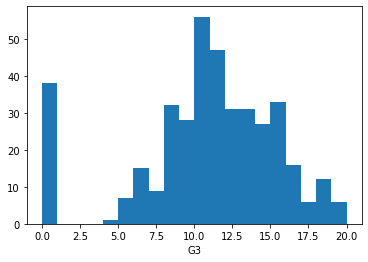

In [17]:
for column in df_num.columns:
    plt.hist(df_num[column], bins = 20)
    plt.xlabel(column)
    plt.show()

In [18]:
df_num[['G2', 'G3']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Test score',
    yTitle='(%) of Students',
    title='G2 and G3')

In [19]:
df_num.pivot(columns='failures', values='G3').iplot(
        kind='box',
        yTitle='Test score',
        title='Score distribution by failures number')

In [20]:
X = df[df.columns[:-1]]
y = df['G3'].to_numpy()
X_num = pd.concat([X[column] for column in X.columns if str(X[column].dtype) == 'int64'], axis = 1).to_numpy()
X_cat = pd.concat([X[column] for column in X.columns if str(X[column].dtype) != 'int64'], axis = 1)
X_cat


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [21]:
X_cat = sklearn.preprocessing.OneHotEncoder().fit_transform(X_cat).toarray()
X = np.concatenate([X_num, X_cat], axis = 1)
X.shape, y.shape, X_num.shape

((395, 58), (395,), (395, 15))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
X_train_num, X_test_num = X_train[:, :15], X_test[:, :15]
X_train_dummy, X_test_dummy = X_train[:, 13:15], X_test[:, 13:15]
print(X_train.shape, X_test.shape)
print(X_train_num.shape, X_test_num.shape)

(296, 58) (99, 58)
(296, 15) (99, 15)


## LinearRegression

In [25]:
from sklearn import linear_model

In [26]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred)}")

Mean squared error on train set: 3.0948468795096553
Mean squared error on test set: 4.253286734223366


In [27]:
num_reg = sklearn.linear_model.LinearRegression()
num_reg.fit(X_train_num, y_train)
y_train_pred_num = num_reg.predict(X_train_num)
y_test_pred_num = num_reg.predict(X_test_num)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_num)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_num)}")

Mean squared error on train set: 3.354526485499286
Mean squared error on test set: 3.654901964488076


In [28]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
reg_sc = sklearn.linear_model.LinearRegression()
reg_sc.fit(X_train_sc, y_train)
y_train_pred_sc = reg_sc.predict(X_train_sc)
y_test_pred_sc = reg_sc.predict(X_test_sc)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_sc)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_sc)}")

Mean squared error on train set: 3.1333694712910907
Mean squared error on test set: 4.166523577598134


In [29]:
scaler_num = sklearn.preprocessing.StandardScaler()
X_train_num_sc = scaler_num.fit_transform(X_train_num)
X_test_num_sc = scaler_num.transform(X_test_num)
num_reg_sc = sklearn.linear_model.LinearRegression()
num_reg_sc.fit(X_train_num_sc, y_train)
y_train_pred_num_sc = num_reg_sc.predict(X_train_num_sc)
y_test_pred_num_sc = num_reg_sc.predict(X_test_num_sc)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_num_sc)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_num_sc)}")

Mean squared error on train set: 3.354526485499286
Mean squared error on test set: 3.6549019644880727


In [30]:
dummy_reg = sklearn.linear_model.LinearRegression()
dummy_reg.fit(X_train_dummy, y_train)
y_train_pred_dummy = dummy_reg.predict(X_train_dummy)
y_test_pred_dummy = dummy_reg.predict(X_test_dummy)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_dummy)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_dummy)}")

Mean squared error on train set: 3.663734133090243
Mean squared error on test set: 3.9048870874592123


## LGBMRegressor

In [31]:
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(X_train, y_train)
y_train_pred_lgbm = lgbm.predict(X_train)
y_test_pred_lgbm = lgbm.predict(X_test)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_lgbm)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_lgbm)}")

Mean squared error on train set: 0.48077318639516875
Mean squared error on test set: 2.492652811334937


In [32]:
lgbm_sc = lightgbm.LGBMRegressor()
lgbm_sc.fit(X_train_sc, y_train)
y_train_pred_lgbm_sc = lgbm_sc.predict(X_train_sc)
y_test_pred_lgbm_sc = lgbm_sc.predict(X_test_sc)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_lgbm_sc)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_lgbm_sc)}")

Mean squared error on train set: 0.48077318639516875
Mean squared error on test set: 2.492652811334937


In [33]:
dummy_lgbm = lightgbm.LGBMRegressor()
dummy_lgbm.fit(X_train_dummy, y_train)
y_train_pred_lgbm_dummy = dummy_lgbm.predict(X_train_dummy)
y_test_pred_lgbm_dummy = dummy_lgbm.predict(X_test_dummy)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_lgbm_dummy)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_lgbm_dummy)}")

Mean squared error on train set: 3.5479658871294077
Mean squared error on test set: 4.458088707444033


## CatBoostRegressor

In [34]:
cbr = catboost.CatBoostRegressor(verbose = 0)
cbr.fit(X_train, y_train, plot = True)
y_train_pred_cbr = cbr.predict(X_train)
y_test_pred_cbr = cbr.predict(X_test)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_cbr)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_cbr)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean squared error on train set: 0.009178071982693183
Mean squared error on test set: 2.6032161651571313


In [35]:
cbr_num = catboost.CatBoostRegressor(verbose = 0)
cbr_num.fit(X_train_num, y_train, plot = True)
y_train_pred_cbr_num = cbr_num.predict(X_train_num)
y_test_pred_cbr_num = cbr_num.predict(X_test_num)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_cbr_num)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_cbr_num)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean squared error on train set: 0.03917932552185543
Mean squared error on test set: 2.619684068094986


In [36]:
dummy_cbr = catboost.CatBoostRegressor(verbose = 0)
dummy_cbr.fit(X_train_dummy, y_train, plot = True)
y_train_pred_cbr_dummy = dummy_cbr.predict(X_train_dummy)
y_test_pred_cbr_dummy = dummy_cbr.predict(X_test_dummy)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train, y_train_pred_cbr_dummy)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test, y_test_pred_cbr_dummy)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean squared error on train set: 2.8592337805272323
Mean squared error on test set: 4.647807057359717


In [37]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(df[df.columns[:-1]], y, test_size=0.25, random_state = 1)
cbr_cat = catboost.CatBoostRegressor(verbose = 0, cat_features = [column for column in df.columns if str(df[column].dtype) != 'int64'])
cbr_cat.fit(X_train_cb, y_train_cb, plot = True)
y_train_pred_cbr_cat = cbr_cat.predict(X_train_cb)
y_test_pred_cbr_cat = cbr_cat.predict(X_test_cb)
print(f"Mean squared error on train set: {sklearn.metrics.mean_squared_error(y_train_cb, y_train_pred_cbr_cat)}")
print(f"Mean squared error on test set: {sklearn.metrics.mean_squared_error(y_test_cb, y_test_pred_cbr_cat)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Mean squared error on train set: 0.32068787975125895
Mean squared error on test set: 2.183420258718776


In [38]:
feature_importances = pd.DataFrame(data = cbr_cat.feature_importances_, index = pd.Index(df.columns[:-1]))
feature_importances.columns = ['feature']
feature_importances

,feature
school,0.068448
sex,0.214080
age,2.977590
address,0.041993
famsize,0.206244
Pstatus,0.001915
Medu,1.310528
Fedu,0.503823
Mjob,1.605408
Fjob,1.222719


In [39]:
feature_importances.sort_values(by = "feature", ascending = False)

,feature
G2,50.012013
G1,14.072051
absences,13.812489
age,2.977590
guardian,2.124965
Mjob,1.605408
reason,1.473239
health,1.320422
Medu,1.310528
Fjob,1.222719
